# Signals and signal processing, III

Lecture 16c - March 14, 2019.

Math 502 - Winter 2019

In [1]:
## Some startup commands

%matplotlib inline
from numpy import * 
from scipy import *
from matplotlib.pyplot import *
from IPython.display import IFrame
from IPython.display import Audio, display

## Summary

- Let's remind ourselves that this is an applied course
- So let's do some examples of an Fourier transform
- Then,let's observe some properties of the transform.

- If we have time, let's look at the Haar transform, first steps



## Fourier transform, numerically

First thing to note is in a computer, we only have a finite amount of information. So when we take a Fourier transform, we are taking a transform of a vector of numbers $\{ a_0, a_1, \ldots, a_{N-1} \}$ with some dimension $N$. The numbers might be real or complex, although in many applications they are just real numbers.

Thinking of these numbers as values of a function $a(k) = a_k$, the Fourier transform of function $a$ is defined as
$$\hat{a}(k) = \langle a,e_k\rangle = \frac{1}{\sqrt{N}}\sum_n a(n) e^{-2\pi i nk/N}.$$
We notice this is just a linear transformation represented by an $n\times N$ matrix $F$ whose entries are
$$F_{kn} = \frac{1}{\sqrt{N}} e^{-2\pi i nk/N}.$$

So we could just set up this matrix on the computer, and do a matrix-vector multiply. A quick operation count shows that this would take about $N^2$ complex multiplications and $N^2$ complex additions, so about $4N^2$ floating point operations. That's a lot.

It turns out there is a fast algorithm called the FFT that takes only about $N\log_2 N$ operations. It is fastest when $N$ is a power of 2, like 128 or 1024 tc. Notice $(1024)^2$ is about a million, while $1024 \log_2 1024$ is about 10,000 so the fast transform really is faster.




## FFT in code.

- in Matlab, you just use the command fft
- in Julia, the command is fft
- in Python, you need to load it in from Numpy, and then use it as fft

In [2]:
t = arange(8)
t

array([0, 1, 2, 3, 4, 5, 6, 7])

In [3]:
fft(t)

array([ 28.+0.j        ,  -4.+9.65685425j,  -4.+4.j        ,
        -4.+1.65685425j,  -4.+0.j        ,  -4.-1.65685425j,
        -4.-4.j        ,  -4.-9.65685425j])

/Users/mikel/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


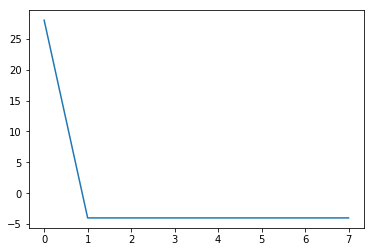

In [4]:
plot(fft(t))

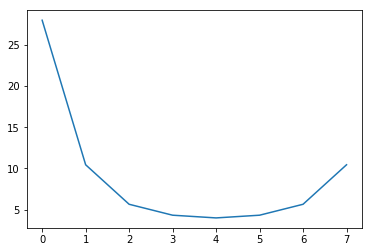

In [5]:
plot(abs(fft(t)))

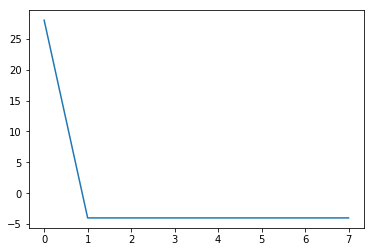

In [6]:
plot(fft(t).real)

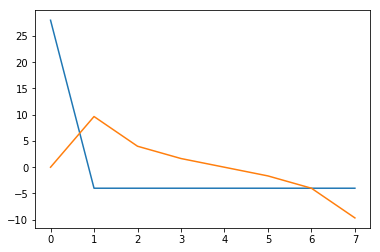

In [7]:
plot(t,fft(t).real,t,fft(t).imag)

In [8]:
linalg.norm(t)

11.832159566199232

In [9]:
linalg.norm(fft(t))

33.466401061363023

In [10]:
linalg.norm(fft(t,norm="ortho"))

11.83215956619923

## Normalization of the FFT.

This comes down to whether we put the $1/\sqrt{N}$ in front of the transform or not. Lots of code does not. Python asks you to specify norm="ortho" to get the orthogonal transformation. (The inverse also needs to be adjusted.)



## FFT of signals

The Fourier transform makes a lot more sense when we look at sampled signals.

Let look at a 1024 sample per second piece of sound. Notice 1024 is a power of 2. Take the FFT and see what we see. 

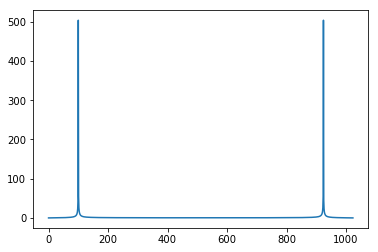

In [11]:
Fs = 1024 # the sampling rate
t = linspace(0,1,Fs)  # time samples
x = sin(2*pi*100*t) # a 100 Hz signal
plot(abs(fft(x)))

We see two spikes, one at 100 Hz and 900 Hz. The 900 Hz is really 900-1000 = -100Hz, so it corresponds to a negative frequency. This is because we can write the sine as a sum of two complex exponentials. 

$$ \sin(2\pi 100 t) = \frac{1}{2i} \left( e^{2\pi i 100 t} - e^{-2\pi i 100 t} \right).$$

## Mirror symmetry

Mention the mirror symmetry for real signals. In general

$$ \hat{f}(-\omega) = \mbox{complex conjugate of }\hat{f}(\omega).$$

So it is also true that $$| \hat{f}(-\omega)| = | \hat{f}(\omega)|.$$

This is called a symmetry.

Why is it true? Well, look at the formulas for the Fourier transform!

It also means that for real signals, you only need to know half of the Fourier transform, the rest is automatic. 


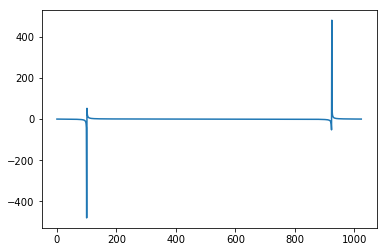

In [13]:
## We can see the positive and negative by looking at the imaginary part.
plot(fft(x).imag)

Of course, the fft works for complex-valued vectors too. Let's stick in 100 Hz complex exponential.

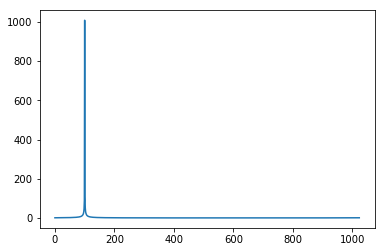

In [14]:
Fs = 1024 # the sampling rate
t = linspace(0,1,Fs)  # time samples
x = exp(2*pi*1j*100*t) # a 100 Hz complex signal
plot(abs(fft(x)))

We can look at what happens with a sum of sine waves.

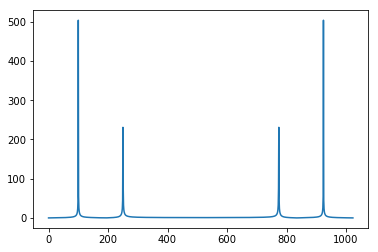

In [15]:
Fs = 1024 # the sampling rate
t = linspace(0,1,Fs)  # time samples
x = sin(2*pi*100*t) + 0.5*sin(2*pi*250*t)# a 100 Hz sand 250 Hz signal
plot(abs(fft(x)))

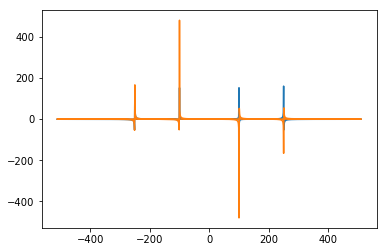

In [17]:
from numpy.fft import fftfreq 
freq = fftfreq(t.shape[-1])
plot(Fs*freq, fft(x).real, Fs*freq, fft(x).imag)

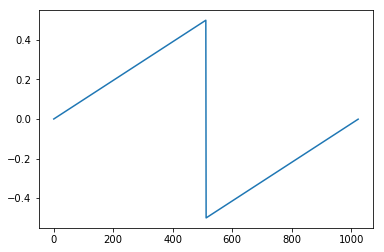

In [30]:
plot(freq)

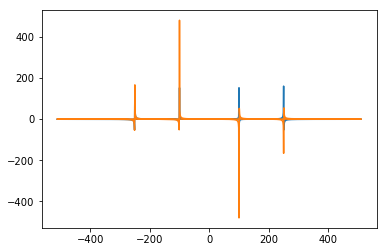

In [31]:
plot(Fs*freq, fft(x).real, Fs*freq, fft(x).imag)

## Convolution

Let's look at the effect of convolution, quickly.

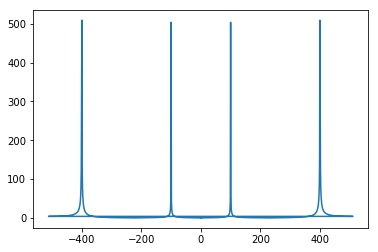

In [18]:
Fs = 1024 # the sampling rate
t = linspace(0,1,Fs)  # time samples
x = sin(2*pi*100*t) + 1.3*sin(2*pi*400*t)# a 100 Hz sand 250 Hz signal
plot(Fs*freq,abs(fft(x)))

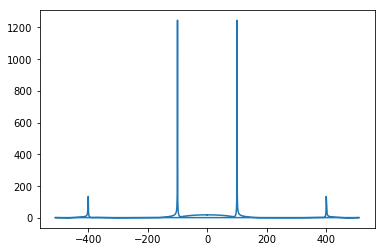

In [20]:
y = convolve(x,[1,1,1,1,1,1,1,1,1,1,1,1,1])
y = y[0:1024]  
plot(Fs*freq,abs(fft(y)))

## Filter response

What is the filter response for these convolution operators? We take their fft.

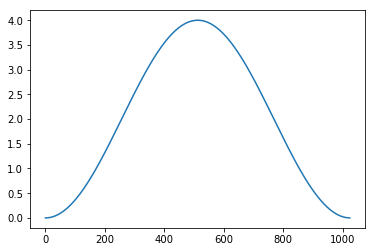

In [24]:
a = zeros(x.shape[-1])
a[range(3)] = [-1,2,-1]  # try 1.6 in the middle term. Try 2.
plot(abs(fft(a)))

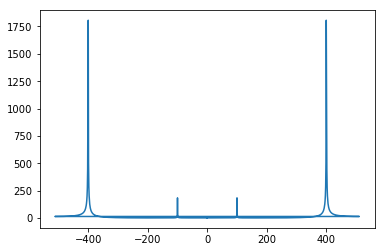

In [25]:
y = convolve(x,[-1,2,-1])
y = y[0:1024]  
plot(Fs*freq,abs(fft(y)))

## Convolution and the Fourier transform

We will talk about convolution and its connection to the FT.

Main point is that the convolution of two functions, when transformed, becomes a product:
$$ \widehat{f*g} = \hat{f}\cdot\hat{g}.$$
Similarly, the product of two functions, when transformed, becomes a convolution:
$$ \widehat{f\cdot g} = \hat{f}*\hat{g}.$$

The only tricky thing is that these operations involve different spaces like $\mathbf(R), \mathbf{Z}$ and the discrete space $\{ 0,1,2,\ldots, N-1 \}$.

## Convolution on sequences, i.e. in $l^2(\mathbf{Z})$